<a href="https://colab.research.google.com/github/lmkelly16/BYU-REU-2022/blob/main/ZOI_%2B_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imports
import pandas as pd
import numpy as np
import glob
import gdal

# Our image processing tools
import skimage.filters
import skimage.io
import skimage.morphology

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sn

# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import it
img_list = glob.glob('/content/drive/MyDrive/BYU_REU_images/*Z+C.tiff')

#sort it
img_list = np.sort(img_list)

#check to make sure it looks right
img_list

array(['/content/drive/MyDrive/BYU_REU_images/1Z+C.tiff',
       '/content/drive/MyDrive/BYU_REU_images/2Z+C.tiff'], dtype='<U47')

Day 1

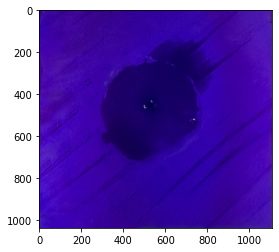

In [4]:
# Load the phase contrast image.
im = skimage.io.imread(img_list[1])

# look at it
plt.imshow(im);

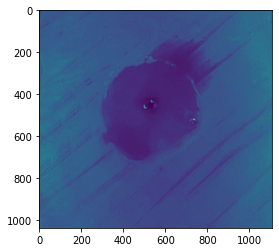

In [5]:
# see how good the contrast is
cim = im[:,:,0]
plt.imshow(cim);

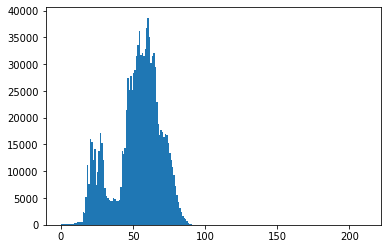

In [6]:
# forcing bins to be discretized by integer value
bins = np.arange(cim.min(), cim.max(), 1)

# plot histogram
plt.hist(cim.flatten(), bins=bins);

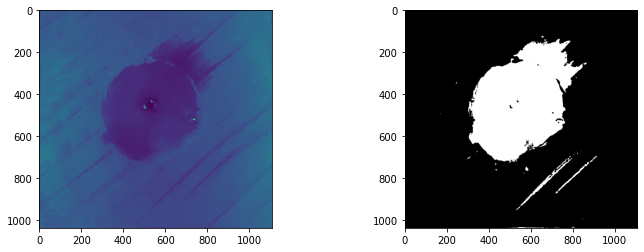

In [7]:
''' Thresholding '''
# Threshold value, as obtained by eye
im_thresh = 37

# Generate thresholded image
im_bw = cim < im_thresh

# plot orginal and thresholded next to each other
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].imshow(cim)
ax[1].imshow(im_bw, cmap=plt.cm.gray);

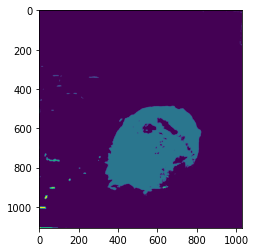

In [ ]:
''' Labeling a segmented image '''

# labels whatever you segmented out (bacteria for example)
labeled = skimage.measure.label(im_bw)
plt.imshow(labeled);

In [ ]:
#make an area list wheeeee!
area_list=[]
for i in range(len(labeled)):
  bacteria = (labeled == i)
  area=bacteria.sum()
  area_list.append(area)
area_list

good=[]
for i in area_list:
  if i > 1000:
    good.append(i)
good

bact_area_1=good[1]
bact_area_1

140304

Day 2

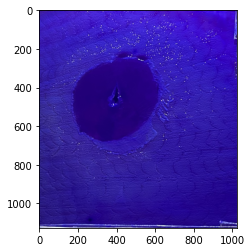

In [ ]:
# Load the phase contrast image.
im2 = skimage.io.imread(img_list[1])

# look at it
plt.imshow(im2);

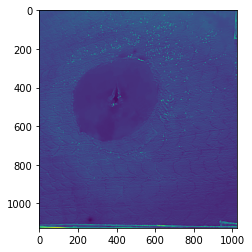

In [ ]:
# see how good the contrast is
cim2 = im2[:,:,0]
plt.imshow(cim2);

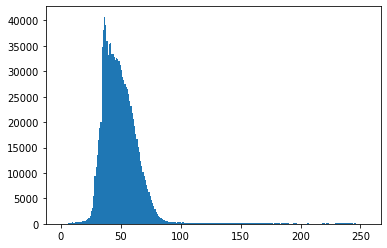

In [ ]:
# forcing bins to be discretized by integer value
bins = np.arange(cim2.min(), cim2.max(), 1)

# plot histogram
plt.hist(cim2.flatten(), bins=bins);

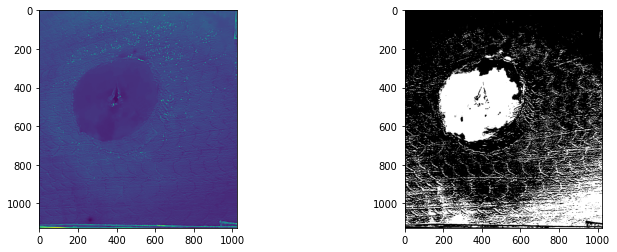

In [ ]:
''' Thresholding '''
# Threshold value, as obtained by eye
im_thresh_2 = 40

# Generate thresholded image
im_bw_2 = cim2 < im_thresh_2

# plot orginal and thresholded next to each other
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].imshow(cim2)
ax[1].imshow(im_bw_2, cmap=plt.cm.gray);

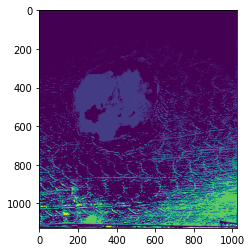

In [ ]:
''' Labeling a segmented image '''

# labels whatever you segmented out (bacteria for example)
labeled_2 = skimage.measure.label(im_bw_2)
plt.imshow(labeled_2);

In [ ]:
#make an area list wheeeee!
area_list_2=[]
for i in range(len(labeled_2)):
  bacteria = (labeled_2 == i)
  area=bacteria.sum()
  area_list_2.append(area)


'''good_2=[]
for i in area_list_2:
  if i > 1000:
    good_2.append(i)

good_2'''

area_list_2

[891303,
 2,
 2,
 1,
 1,
 6,
 1,
 1,
 4,
 3,
 8,
 6,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 10,
 1,
 3,
 1,
 3,
 1,
 2,
 4,
 8,
 2,
 2,
 1,
 2,
 5,
 4,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 9,
 6,
 5,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 52,
 1,
 23,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 3,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 7,
 1,
 1,
 10,
 4,
 12,
 5,
 3,
 3,
 3,
 9,
 8,
 1,
 6,
 6,
 1,
 1,
 10,
 20,
 2,
 1,
 6,
 15,
 1,
 1,
 1,
 11,
 2,
 1,
 6,
 9,
 3,
 1,
 1,
 14,
 4,
 4,
 1,
 1,
 1,
 23,
 2,
 1,
 2,
 2,
 6,
 40,
 3,
 1,
 1,
 31,
 4,
 3,
 5,
 7,
 1,
 1,
 2,
 1,
 3,
 5,
 2,
 4,
 3,
 2,
 1,
 3,
 12,
 3,
 3,
 4,
 1,
 18,
 18,
 2,
 13,
 1,
 2,
 3,
 2,
 6,
 21,
 17,
 1,
 1,
 1,
 3,
 1,
 3,
 5,
 2,
 1,
 1,
 2,
 6,
 3,
 1,
 4,
 2,
 4,
 13,
 1,
 1,
 19,
 1,
 1,
 8,
 4,
 1,
 33,
 5,
 1,
 1,
 3,
 13,
 1,
 5,
 12,
 59,
 3,
 2,
 1,
 9,
 7,
 5,
 5,
 1,
 11,
 2,
 4,
 2,
 2,
 1,
 6,
 13,
 2,
 6,
 1,
 1,
 10,
 3,
 2,
 14,
 1,
 1,
 8,
 1,
 2,
 1,
 2

In [9]:
area_list=[]
zone_area_list=[]

for i in range(len(img_list)):
  
  # Load the phase contrast image.
  im = skimage.io.imread(img_list[i])
  cim = im[:,:,0]

  # Threshold value, as obtained by eye
  im_thresh = 37

  # Generate thresholded image
  im_bw = cim < im_thresh

  # labels whatever you segmented out (bacteria for example)
  labeled = skimage.measure.label(im_bw)

  #make an area list wheeeee!
  for i in range(len(labeled)):
    bacteria = (labeled == i)
    area=bacteria.sum()
    area_list.append(area)

  for i in area_list:
    if i > 5000 and i < 300000:
      zone_area_list.append(i)

zone_area_list

[140304, 140304, 194968]